KÜTÜPHANELER

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

VERİYİ ÇEKME

In [2]:
df = pd.read_csv("veri-seti.csv")
df

,Pregnant Number,Plasma Glucose,Diolastic Blood Pressure(mm Hg),Triceps Skinfold Thickness(mm),2-Hours Serum Insulin(mu U/ml),Body Mass Index,Diabetes Pedigree Function,Age,Diabet
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


INPUT VE OUTPUTLARI OLUSTURMA

In [3]:
X = df.drop(columns=['Diabet'])
y = df['Diabet']

In [4]:
X 

,Pregnant Number,Plasma Glucose,Diolastic Blood Pressure(mm Hg),Triceps Skinfold Thickness(mm),2-Hours Serum Insulin(mu U/ml),Body Mass Index,Diabetes Pedigree Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Diabet, Length: 768, dtype: int64

VERI SETINI TEST VE TRAIN OLARAK BOLME

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [7]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [8]:
X_test

array([[ 0.05230888,  0.42549532,  0.17820347, ..., -0.99307887,
        -0.61607281,  2.32360228],
       [ 0.05230888,  2.42534696,  0.0772591 , ...,  0.63544071,
         5.67787693, -0.16302899],
       [ 1.24762239,  0.96513782,  0.48103658, ...,  1.41814004,
         0.11699443,  0.26570054],
       ...,
       [-0.54534788, -0.49507131,  0.58198095, ...,  0.25671523,
         0.71510369, -0.33452081],
       [ 0.05230888,  1.66349871,  0.0772591 , ..., -0.24825209,
        -0.35842575,  0.00846282],
       [-0.84417626,  2.39360328,  0.38009221, ...,  0.61019234,
         1.21812891, -0.33452081]])

In [9]:
X_train

array([[ 1.24762239,  2.42534696,  0.27914784, ..., -0.72797103,
         2.18737264,  0.52293825],
       [-0.84417626,  1.47303665,  0.27914784, ..., -1.0435756 ,
        -0.09464423,  0.00846282],
       [-1.14300463,  0.23503326, -0.02368527, ..., -0.14725862,
         2.80081803, -0.67750443],
       ...,
       [-0.2465195 ,  1.88570445, -0.22557401, ...,  0.29458777,
        -0.63447618, -0.59175852],
       [-0.84417626, -0.3680966 , -0.52840712, ..., -0.39974228,
        -0.79397198, -0.93474215],
       [-1.14300463,  2.13965387,  0.68292532, ...,  0.04210412,
         0.62615411, -0.93474215]])

MULTINOMINAL LOJISTIK REGRESYON MODELI

In [10]:
multinomial_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multinomial_log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

KATSAYILARI RAPORLAMA VE TAHMİN

In [11]:
print("Multinominal Lojistik Regresyon Katsayıları:")
print(multinomial_log_reg.coef_)


multinomial_log_reg_predictions = multinomial_log_reg.predict(X_test)

Multinominal Lojistik Regresyon Katsayıları:
[[ 0.14708921  0.64945711 -0.12566781 -0.01002327 -0.09678434  0.33240018
   0.14181977  0.06604267]]


CONFUSION MATRIX OLUSTURMA

In [12]:
conf_matrix_multinomial = confusion_matrix(y_test, multinomial_log_reg_predictions)
print("\nConfusion Matrix (Multinominal Lojistik Regresyon):")
print(conf_matrix_multinomial)

print("\nClassification Report (Multinominal Lojistik Regresyon):")
print(classification_report(y_test, multinomial_log_reg_predictions))


Confusion Matrix (Multinominal Lojistik Regresyon):
[[128  20]
 [ 35  48]]

Classification Report (Multinominal Lojistik Regresyon):
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       148
           1       0.71      0.58      0.64        83

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.76      0.76       231



CONFUSION MATRIX HEATMAP

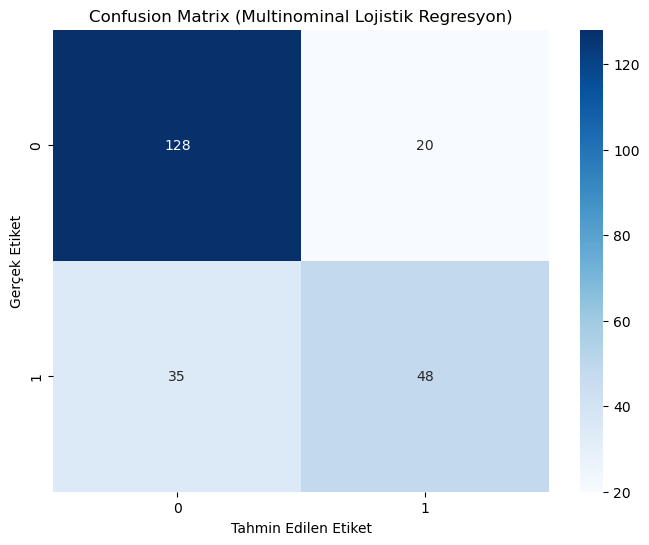

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix'i grafik olarak görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_multinomial, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Multinominal Lojistik Regresyon)")
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.show()